读取json格式数据

In [27]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 

# 读取数据
data = pd.read_json('data.json')
data.head()

,x,y
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
3,"[2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


将数据转换为numpy array，以便输入模型训练

In [28]:
temp_data = []
for i in range(len(data['x'])):
  temp_data.append(np.asarray(data['x'][i]))

print(temp_data[0])

#dataset = tf.data.Dataset.from_tensor_slices((data['x'].values, data['y'].values))

[0.     0.     0.     ... 0.0036 0.     0.    ]


将数据和对应的标签分别提取出来，并将标签编码为独热码

In [29]:
alldata = np.asarray(temp_data)
allabel = np.asarray(data['y'])


In [30]:
from keras.utils.np_utils import to_categorical
allabel = to_categorical(allabel)

In [31]:
print(type(allabel[0]))

<class 'numpy.ndarray'>


将所有数据分割为训练集和测试集

In [32]:
x_train = alldata[:3200]
x_test = alldata[3200:]
y_train = allabel[:3200]
y_test = allabel[3200:]

搭建网络

In [54]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1147,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

训练网络

In [55]:
history = model.fit(x_train,
          y_train,
          epochs=100,
          batch_size=100,
          validation_data=(x_test, y_test))

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 0.9689 - accuracy: 0.6438 - val_loss: 0.8556 - val_accuracy: 0.7083
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7987 - accuracy: 0.6881 - val_loss: 0.7429 - val_accuracy: 0.6913
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7276 - accuracy: 0.7056 - val_loss: 0.7173 - val_accuracy: 0.7037
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.7281 - val_loss: 0.7073 - val_accuracy: 0.7128
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6586 - accuracy: 0.7319 - val_loss: 0.7090 - val_accuracy: 0.7060
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6345 - accuracy: 0.7456 - val_loss: 0.7108 - val_accuracy: 0.7026
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6132 - accuracy: 0.7538 - val_loss: 0.7213 - val_accuracy: 0.7026
Epoch 8/100
3

In [35]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

绘制准确率曲线

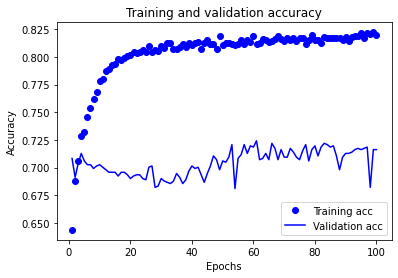

In [56]:
import matplotlib.pyplot as plt
history_dict = history.history
epochs = range(1, len(loss_values) + 1)

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()